In [12]:
# https://www.kaggle.com/poonaml/deep-neural-network-keras-way
# 这个文件没有完成！！！
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O(e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

from subprocess import check_output
#print(check_output(["ls","../input"]).decode("utf8"))
import os
print(os.listdir('.'))


['.ipynb_checkpoints', 'DigitRecognizer1.ipynb', 'DigitRecognizer2.ipynb', 'results1.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [13]:
# create the training & test sets, skipping the header row with [1:]
train=pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_train=(train.ix[:,1:].values).astype('float32') #all pixel values
y_train=train.ix[:,0].values.astype('int32')#only labels i.e target digits
X_test=test.values.astype('float32')

In [17]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [18]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

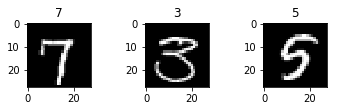

In [19]:
# Convert train dataset to (num_images, img_rows, img_cols) form at
X_train=X_train.reshape(X_train.shape[0],28,28)
for i in range(6,9):
    plt.subplot(330+(i+1))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [20]:
# expand 1 more dimention as 1 for color channel gray

X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_train.shape

(42000, 28, 28, 1)

In [21]:
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [22]:
mean_px=X_train.mean().astype(np.float32)
std_px=X_train.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

In [26]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train)
num_classes=y_train.shape[1]
num_classes

2

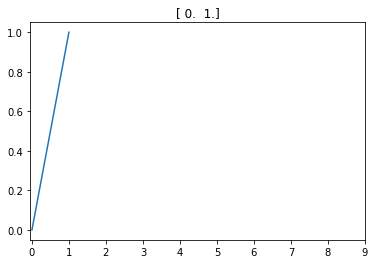

In [28]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [29]:
# fix random seed for reproducibility
seed=43
np.random.seed(seed)

In [30]:
from keras.models import Sequential
from keras.layers.core import Lambda,Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [31]:
model = Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ", model.input_shape)
print("output shape ", model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [32]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [35]:
"""from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)
"""
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

ValueError: Found input variables with inconsistent numbers of samples: [42000, 1680000]

In [36]:
history=model.fit_generator(batches,batches.n,nb_epoch=1,validation_data=val_batches,nb_val_samples=val_batches.n)

NameError: name 'batches' is not defined

In [37]:
history_dict=history.history
history_dict.keys()

NameError: name 'history' is not defined

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values=history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_value, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

NameError: name 'history_dict' is not defined

In [39]:
plt.clf() #clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

NameError: name 'history_dict' is not defined

In [40]:
model.optimizer.lr=0.01
gen=image.ImageDataGenerator()
batches=gen.flow(X_train,y_train,batch_size=64)
history=model.fit_generator(batches, batches.n, nb_epoch=1)

ValueError: X (images tensor) and y (labels) should have the same length. Found: X.shape = (42000, 28, 28, 1), y.shape = (1680000, 2)

In [41]:
predictions=model.predict_classes(X_test, verbose=0)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                          "Label":predictions})
submission.to_csv("DR.csv", index=False, header=True )

NameError: name 'submission' is not defined